In [ ]:
#Predict delivery time using sorting time
#Build a simple linear regression model by performing EDA 
#and do necessary transformations and select the best model using R or Python.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings 

In [13]:
data=pd.read_csv(r"C:\Users\MS_More\Desktop\Data Science\Materials\A4\delivery_time.csv")

In [14]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [16]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [62]:
data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
print(skew(data1.delivery_time))

0.326702631656106


<AxesSubplot:xlabel='delivery_time'>

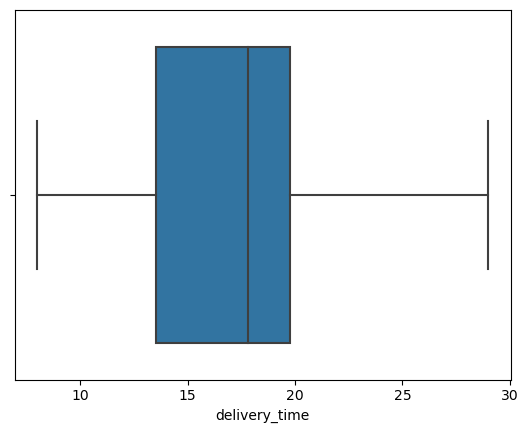

In [24]:
sns.boxplot(data1['delivery_time'], orient = 'h')

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

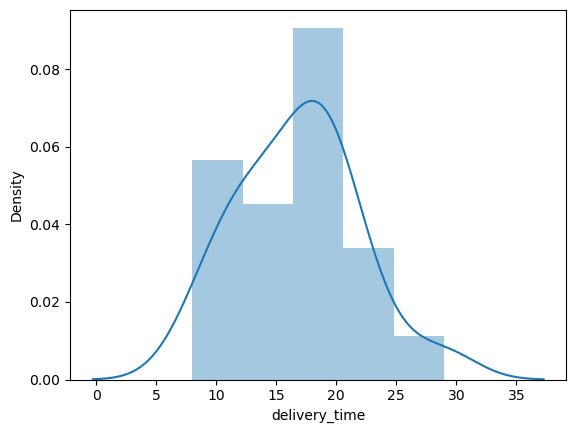

In [25]:
sns.distplot(data1['delivery_time'])

In [26]:
print(skew(data1.sorting_time))

0.043680994983108075


<AxesSubplot:xlabel='sorting_time'>

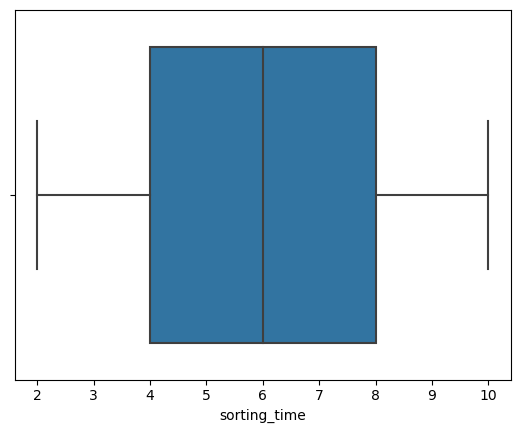

In [27]:
sns.boxplot(data1['sorting_time'], orient='h')

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

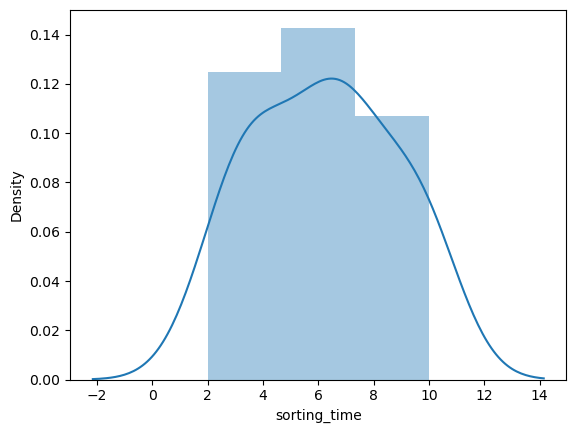

In [28]:
sns.distplot(data1['sorting_time'])

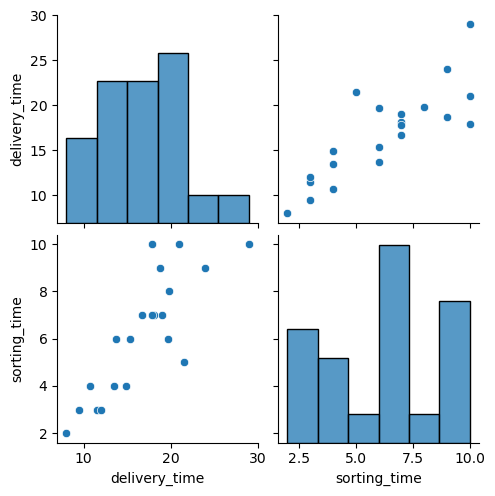

In [29]:
sns.pairplot(data1)

In [31]:
data1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

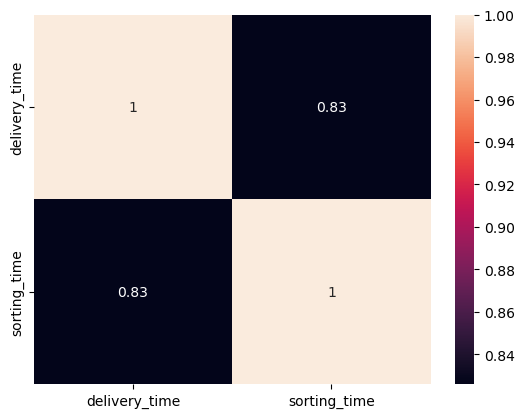

In [32]:
sns.heatmap(data1.corr(), annot=True)

In [36]:
model=smf.ols("delivery_time~np.log(sorting_time)",data=data1).fit()

Text(0.5, 0, 'log(sorting_time)')

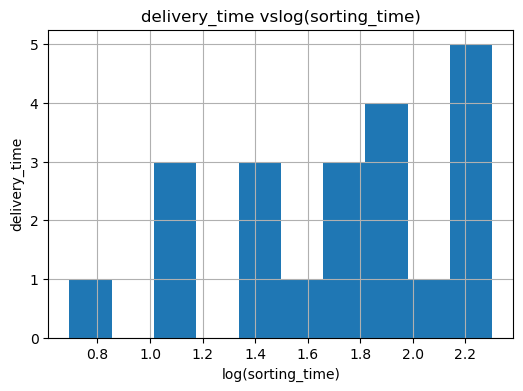

In [37]:
data1['log_sorting_time']=np.log(data1['sorting_time'])
data1.hist('log_sorting_time',figsize=(6,4))
plt.title('delivery_time vslog(sorting_time)')
plt.ylabel('delivery_time')
plt.xlabel("log(sorting_time)")

Text(0.5, 0, 'sqrt(sorting_time)')

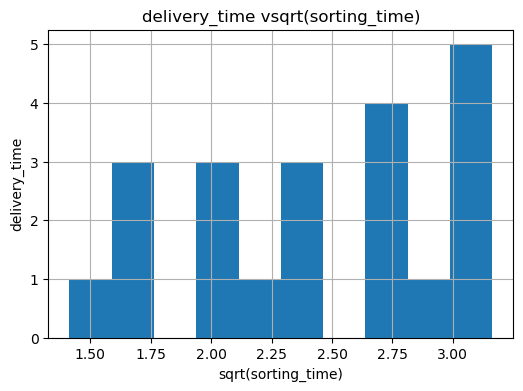

In [38]:
data1['log_sorting_time']=np.sqrt(data1['sorting_time'])
data1.hist('log_sorting_time',figsize=(6,4))
plt.title('delivery_time vsqrt(sorting_time)')
plt.ylabel('delivery_time')
plt.xlabel("sqrt(sorting_time)")

Text(0.5, 0, 'cbrt(sorting_time)')

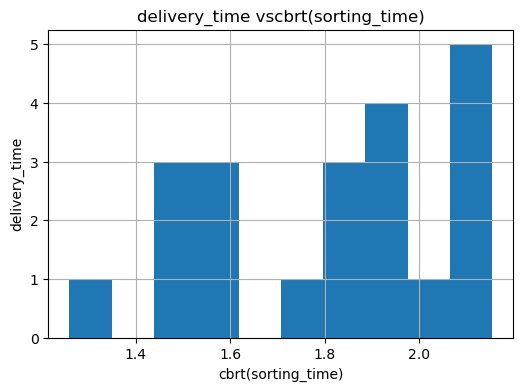

In [39]:
data1['log_sorting_time']=np.cbrt(data1['sorting_time'])
data1.hist('log_sorting_time',figsize=(6,4))
plt.title('delivery_time vscbrt(sorting_time)')
plt.ylabel('delivery_time')
plt.xlabel("cbrt(sorting_time)")

In [41]:
print(model.params,'\n''\n',model.tvalues,'\n''\n',model.pvalues)

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64 

 Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64 

 Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [42]:
model.tvalues , model.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        14:22:54   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model.rsquared , model.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [45]:
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [46]:
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [48]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [50]:
model.predict(data_pred)

0    17.363305
1    19.964933
dtype: float64

In [ ]:
#above model is best model

In [ ]:
#Salary_hike -> Build a prediction model for Salary_hike
#Build a simple linear regression model by performing EDA 
#and do necessary transformations and select the best model using R or Python

In [69]:
df=pd.read_csv(r"C:\Users\MS_More\Desktop\Data Science\Materials\A4\salary_data.csv")

In [70]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [72]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [76]:
df1=df.rename({'YearsExperience':'Ye', 'Salary':'Sa'},axis=1)

In [77]:
df1.head()

,Ye,Sa
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [78]:
print(skew(df1.Ye))

0.3603123252525561


<AxesSubplot:xlabel='Ye'>

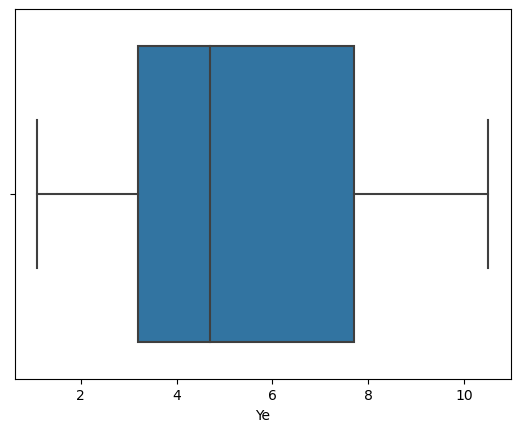

In [79]:
sns.boxplot(df1['Ye'], orient = 'h')

<AxesSubplot:xlabel='Ye', ylabel='Density'>

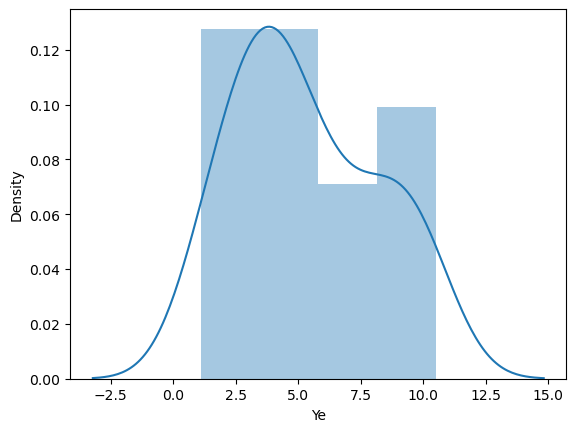

In [80]:
sns.distplot(df1['Ye'])

In [81]:
print(skew(df1.Sa))

0.3361618825592921


<AxesSubplot:xlabel='Sa'>

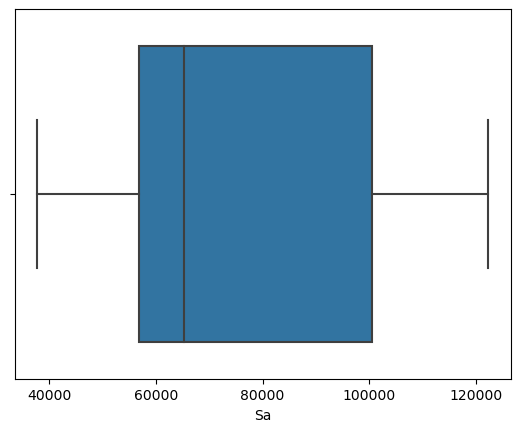

In [82]:
sns.boxplot(df1['Sa'], orient='h')

<AxesSubplot:xlabel='Sa', ylabel='Density'>

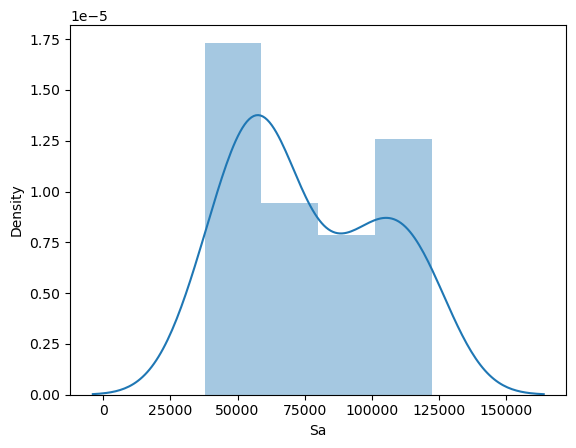

In [83]:
sns.distplot(df1['Sa'])

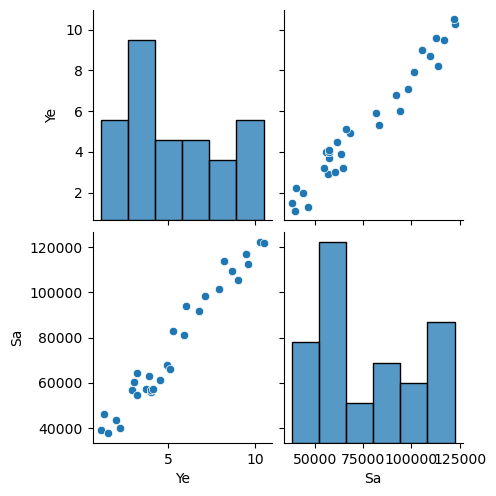

In [84]:
sns.pairplot(df1)

<AxesSubplot:ylabel='Density'>

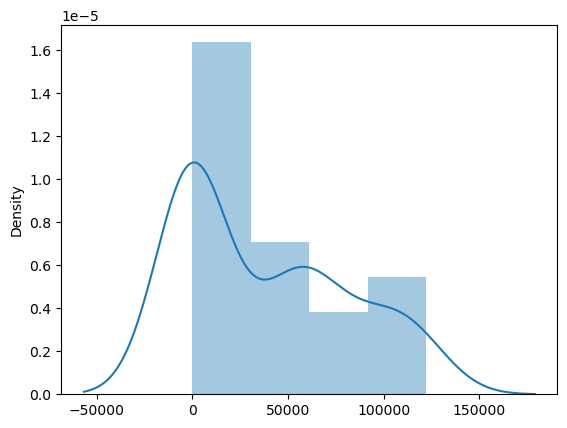

In [85]:
sns.distplot(df1)

In [86]:
df1.corr()

,Ye,Sa
Ye,1.000000,0.978242
Sa,0.978242,1.000000


<AxesSubplot:>

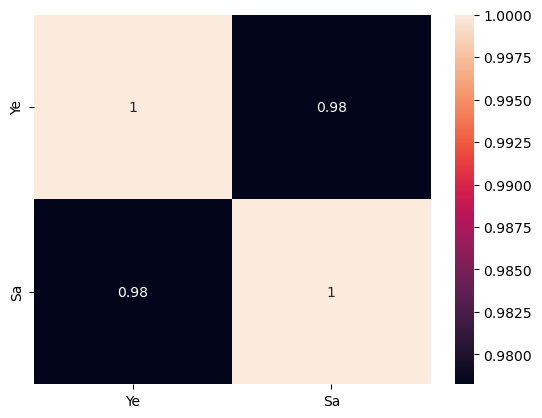

In [87]:
sns.heatmap(df1.corr(), annot=True)

In [88]:
model1=smf.ols("Sa~np.log(Ye)",data=df1).fit()

In [89]:
model1.params

Intercept     14927.97177
np.log(Ye)    40581.98796
dtype: float64

In [90]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Sa   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        15:10:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Ye)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model1.tvalues, model1.pvalues

(Intercept      2.895135
 np.log(Ye)    12.791989
 dtype: float64,
 Intercept     7.268813e-03
 np.log(Ye)    3.250155e-13
 dtype: float64)

In [93]:
model1.rsquared , model1.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [94]:
model2=smf.ols("Sa~np.sqrt(Ye)",data=df1).fit()

In [95]:
model2.params

Intercept     -16055.769117
np.sqrt(Ye)    41500.680583
dtype: float64

In [96]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Sa   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           8.57e-18
Time:                        15:15:48   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Ye)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model2.tvalues, model2.pvalues

(Intercept      -3.262308
 np.sqrt(Ye)    19.437148
 dtype: float64,
 Intercept      2.906965e-03
 np.sqrt(Ye)    8.565358e-18
 dtype: float64)

In [98]:
model2.rsquared , model2.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

In [99]:
model3=smf.ols("Sa~np.square(Ye)",data=df1).fit()

In [100]:
model3.params

Intercept        48042.585515
np.square(Ye)      776.318773
dtype: float64

In [101]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Sa   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.52e-16
Time:                        15:19:39   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Ye)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model3.tvalues, model1.pvalues

(Intercept        21.973654
 np.square(Ye)    17.397015
 dtype: float64,
 Intercept     7.268813e-03
 np.log(Ye)    3.250155e-13
 dtype: float64)

In [105]:
model3.rsquared , model1.rsquared_adj

(0.9153198857852565, 0.8486706286926861)

In [117]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [118]:
new_data1=pd.Series([2,6])
new_data1

0    2
1    6
dtype: int64

In [119]:
data_pred1=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,2
1,6


In [124]:
model3.predict(df1)

0      48981.931230
1      49354.564241
2      49789.302755
3      51147.860608
4      51799.968377
5      54571.426398
6      55029.454474
7      55992.089753
8      55992.089753
9      58670.389521
10     59850.394057
11     60463.685888
12     60463.685888
13     61092.504094
14     63763.040674
15     66681.999262
16     68234.636808
17     69849.379857
18     75066.242014
19     75990.061354
20     83939.565592
21     87176.814877
22     96492.640157
23    100242.259832
24    106802.153466
25    110924.406153
26    118105.354806
27    119588.123663
28    130402.244175
29    133631.730272
dtype: float64